<a href="https://colab.research.google.com/github/MarioVidal-Co/Analitica/blob/main/Reto_3_Mario_Vidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlación:
           Enroll       Age    Income     Hours
Enroll  1.000000  0.644033  0.476372 -0.048184
Age     0.644033  1.000000  0.450562 -0.040133
Income  0.476372  0.450562  1.000000 -0.018196
Hours  -0.048184 -0.040133 -0.018196  1.000000


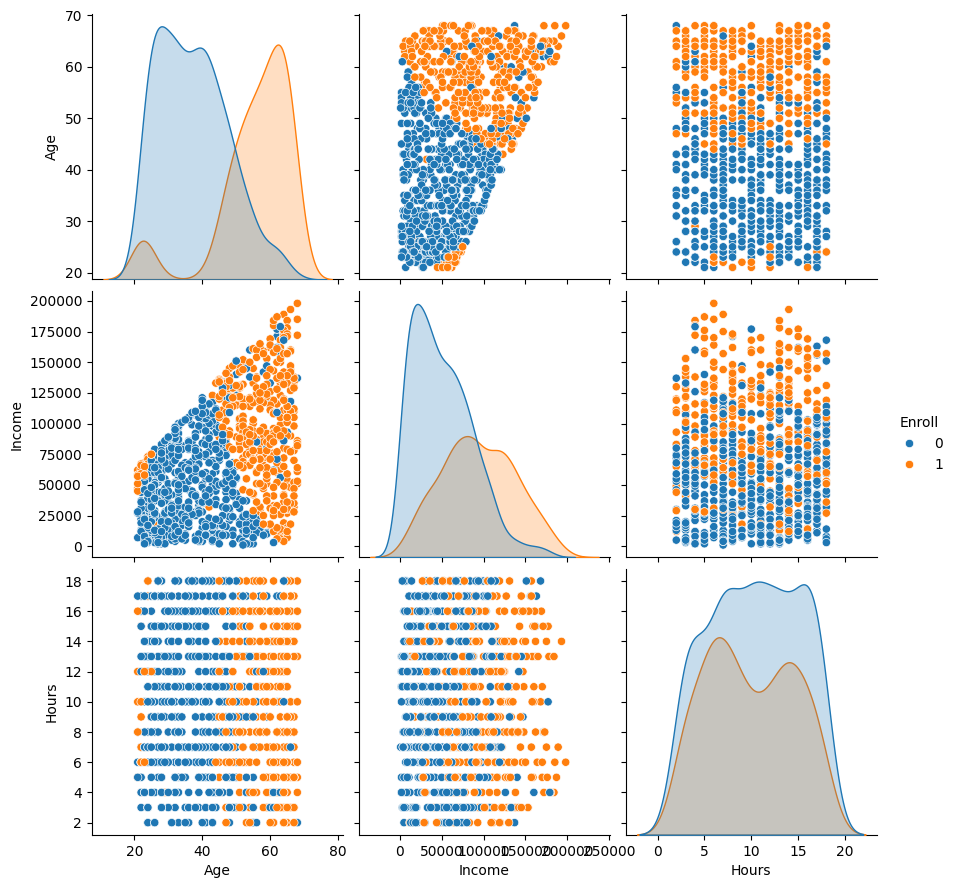

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from sre_constants import ANY_ALL
nxl= '/content/drive/MyDrive/Análitica de Negocios/3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)


XDB=XDB[['Enroll','Age','Income','Hours']]

sns.pairplot(XDB, hue='Enroll',size=3,vars=['Age','Income','Hours'])
corr = XDB.corr()
print("Esta es la matriz de correlación:\n",corr)

XD=np.array(XDB.iloc[:,1:4])

yd=np.array(XDB.iloc[:,0])

Esta es la matriz de confusión:
 [[538  59]
 [145 258]]
Exactitud: 0.796
Sensibilidad: 0.6401985111662531
Especificidad: 0.9011725293132329
Suscripción: [0]


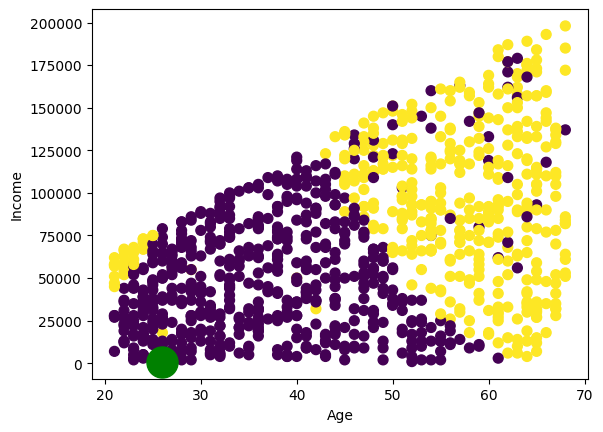

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,yd)

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusión:\n",cm)

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Esp=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Esp)

#Modelo me va
XDP=np.array([[26,800,15]])
ydpp=mknn.predict(XDP)
print("Suscripción:",ydpp)

#Las garficas siempre se hacen con las variables que tienen mas correlación
#s=tamaño de las bolitas
#c=yd -> color aprobados y prenegados
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],s=500,marker='o',facecolors='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedó el primer inscrito 0
Donde quedó el segundo inscrito 0
Donde quedó el tercer inscrito 0


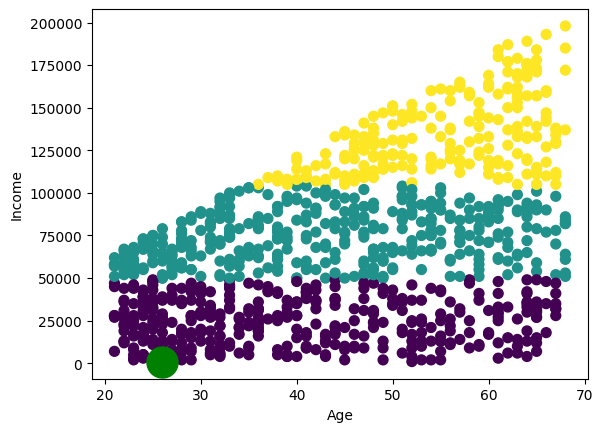

Inscritos: [0]
El porcentaje de No Inscritos para el cluster 2 es: 0.5772151898734177
El porcentaje de Inscritos para el cluster 2 es: 0.42278481012658226
El porcentaje de No Inscritos para el cluster 1 es: 0.8264248704663213
El porcentaje de Inscritos para el cluster 1 es: 0.17357512953367876
El porcentaje de No Inscritos para el cluster 3 es: 0.228310502283105
El porcentaje de Inscritos para el cluster 3 es: 0.771689497716895
Caracteristicas sociodemograficas de cada cluster son:
 [[3.98860104e+01 2.46943005e+04 1.04067358e+01]
 [4.31645570e+01 7.43392405e+04 1.02177215e+01]
 [5.54155251e+01 1.34447489e+05 9.72146119e+00]]


In [ ]:
np.random.seed(42)
k=3
mkm=KMeans(n_clusters=3,init='random',random_state=42)
mkm.fit(XD,yd)

labels=mkm.labels_
print("Donde quedó el primer inscrito",labels[0,])
print("Donde quedó el segundo inscrito",labels[1,])
print("Donde quedó el tercer inscrito",labels[2,])

plt.scatter(XD[:,0],XD[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],s=500,marker='o',facecolors='green')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

XDP=np.array([[26,800,15]])
ydpp2=mknn.predict(XDP)
print("Inscritos:",ydpp2)

#Cuanto es el porcentaje de preaprobado y negados del cluster 2
c10=len(np.where((labels==1) & (yd==0))[0])
c11=len(np.where((labels==1) & (yd==1))[0])
print("El porcentaje de No Inscritos para el cluster 2 es:",c10/(c10+c11))
print("El porcentaje de Inscritos para el cluster 2 es:",c11/(c10+c11))

#Para el cluster 1
c0=len(np.where((labels==0) & (yd==0))[0])
c1=len(np.where((labels==0) & (yd==1))[0])
print("El porcentaje de No Inscritos para el cluster 1 es:",c0/(c0+c1))
print("El porcentaje de Inscritos para el cluster 1 es:",c1/(c0+c1))

#Para el 3
c20=len(np.where((labels==2) & (yd==0))[0])
c21=len(np.where((labels==2) & (yd==1))[0])
print("El porcentaje de No Inscritos para el cluster 3 es:",c20/(c20+c21))
print("El porcentaje de Inscritos para el cluster 3 es:",c21/(c20+c21))

cluster=mkm.cluster_centers_
print("Caracteristicas sociodemograficas de cada cluster son:\n",cluster)

**Análisis**

Los resultados del modelo indican un buen desempeño en la predicción de suscripciones al gimnasio, con una precisión general del 79%. La edad y los ingresos emergieron como los factores más influyentes en esta predicción. Los análisis de clustering revelaron tres grupos distintos de usuarios, cada uno con características demográficas y de comportamiento específicas. El grupo con menor probabilidad de suscripción presentó una edad promedio más baja y menores ingresos, mientras que el grupo con mayor probabilidad de suscripción mostró una edad promedio más alta y mayores ingresos.

En este estudio, el modelo demostró una capacidad destacada para predecir la adhesión a un programa de gimnasio, alcanzando una exactitud del 79%. Los indicadores de sensibilidad (64%) y especificidad (90%) respaldan estos resultados. La edad y el nivel de ingresos se identificaron como las variables más significativas para determinar la probabilidad de suscripción. El análisis de clustering reveló tres segmentos de usuarios, cada uno con un perfil distintivo. El primer grupo, caracterizado por una edad promedio de 30 años, ingresos de 24,000 y un promedio de 10 horas de actividad física, presentó la menor proporción de suscriptores. Por el contrario, el tercer grupo, con una edad promedio de 55 años, ingresos de 130,000 y un promedio de 90 horas de actividad física, mostró la mayor proporción de suscriptores.